In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         12.5892 (11.7836, 13.4346) (11.7611, 13.4063)  1.6452 (Jnode 106)\n',
 't_n56         12.4878 (11.7020, 13.3076) (11.7006, 13.3046)  1.6041 (Jnode 105)\n',
 't_n57         11.7851 (11.0581, 12.5493) (11.0460, 12.5305)  1.4844 (Jnode 104)\n',
 't_n58         10.4392 ( 9.8301, 11.0660) ( 9.8409, 11.0719)  1.2309 (Jnode 103)\n',
 't_n59         10.0493 ( 9.4531, 10.6622) ( 9.4458, 10.6525)  1.2067 (Jnode 102)\n',
 't_n60          9.5691 ( 8.9826, 10.1721) ( 8.9720, 10.1614)  1.1894 (Jnode 101)\n',
 't_n61          8.9116 ( 8.3314,  9.5039) ( 8.3393,  9.5090)  1.1697 (Jnode 100)\n',
 't_n62          4.7749 ( 4.0642,  5.3857) ( 4.0529,  5.3706)  1.3177 (Jnode 99)\n',
 't_n63          4.9762 ( 4.5863,  5.3946) ( 4.5652,  5.3626)  0.7973 (Jnode 98)\n',
 't_n64          3.0019 ( 2.7297,  3.2968) ( 2.7190,  3.2854)  0.5664 (Jnode 97)\n',
 't_n65          2.6301 ( 2.3875,  2.8967) ( 2.3796,  2.8854)  0.5058 (Jnode 96)\n',
 't_n66          2.0805 ( 1.8791,  2.2979) ( 1.8718,  2.28

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[12.5892,
 12.4878,
 11.7851,
 10.4392,
 10.0493,
 9.5691,
 8.9116,
 4.7749,
 4.9762,
 3.0019,
 2.6301,
 2.0805,
 1.4788,
 1.0477,
 0.6232,
 3.809,
 9.7519,
 9.3207,
 8.7182,
 6.1739,
 5.5521,
 5.1258,
 9.6787,
 9.2319,
 8.8552,
 8.2814,
 7.6367,
 7.4107,
 6.6125,
 6.0232,
 5.5159,
 4.1437,
 3.7632,
 6.4586,
 5.0696,
 9.4728,
 2.4412,
 9.1915,
 8.4534,
 7.4168,
 6.7972,
 4.9394,
 5.4502,
 7.1345,
 6.8435,
 6.307,
 4.7642,
 6.8357,
 10.3515,
 5.8333,
 3.3617,
 3.9169,
 7.6764]

In [7]:
lower_ci_iqtree

[3.4346,
 3.3076,
 2.5493,
 0.8301,
 0.4531,
 0.9826,
 0.3314,
 0.0642,
 0.5863,
 0.7297,
 0.3875,
 0.8791,
 0.3381,
 0.9522,
 0.614,
 0.5908,
 0.1647,
 0.6999,
 0.1425,
 0.5596,
 0.9629,
 0.0455,
 0.12,
 0.6828,
 0.3172,
 0.7716,
 0.1578,
 0.9388,
 0.1525,
 0.5716,
 0.0643,
 0.7166,
 0.3442,
 0.9914,
 0.666,
 0.9191,
 0.0119,
 0.6546,
 0.9548,
 0.9952,
 0.4201,
 0.3639,
 0.2676,
 0.5938,
 0.3049,
 0.755,
 0.0754,
 0.2118,
 0.5734,
 0.0111,
 0.6823,
 0.3679,
 0.5953]

In [8]:
upper_ci_iqtree

[11.7611,
 11.7006,
 11.046,
 11.066,
 10.6622,
 10.1721,
 9.5039,
 5.3857,
 5.3946,
 3.2968,
 2.8967,
 2.2979,
 1.6372,
 1.1608,
 0.6453,
 4.2,
 10.3646,
 9.9605,
 9.3158,
 6.8215,
 6.2029,
 5.3527,
 10.2456,
 9.783,
 9.393,
 8.7828,
 8.0951,
 7.8698,
 7.0473,
 6.4397,
 5.9169,
 4.5057,
 4.118,
 6.9053,
 5.3355,
 10.0316,
 2.9362,
 9.7418,
 8.9705,
 7.8708,
 7.1977,
 5.4054,
 5.5603,
 7.6726,
 7.3789,
 6.855,
 5.3426,
 7.4568,
 11.1347,
 6.7567,
 4.0372,
 4.5394,
 8.8053]

In [9]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

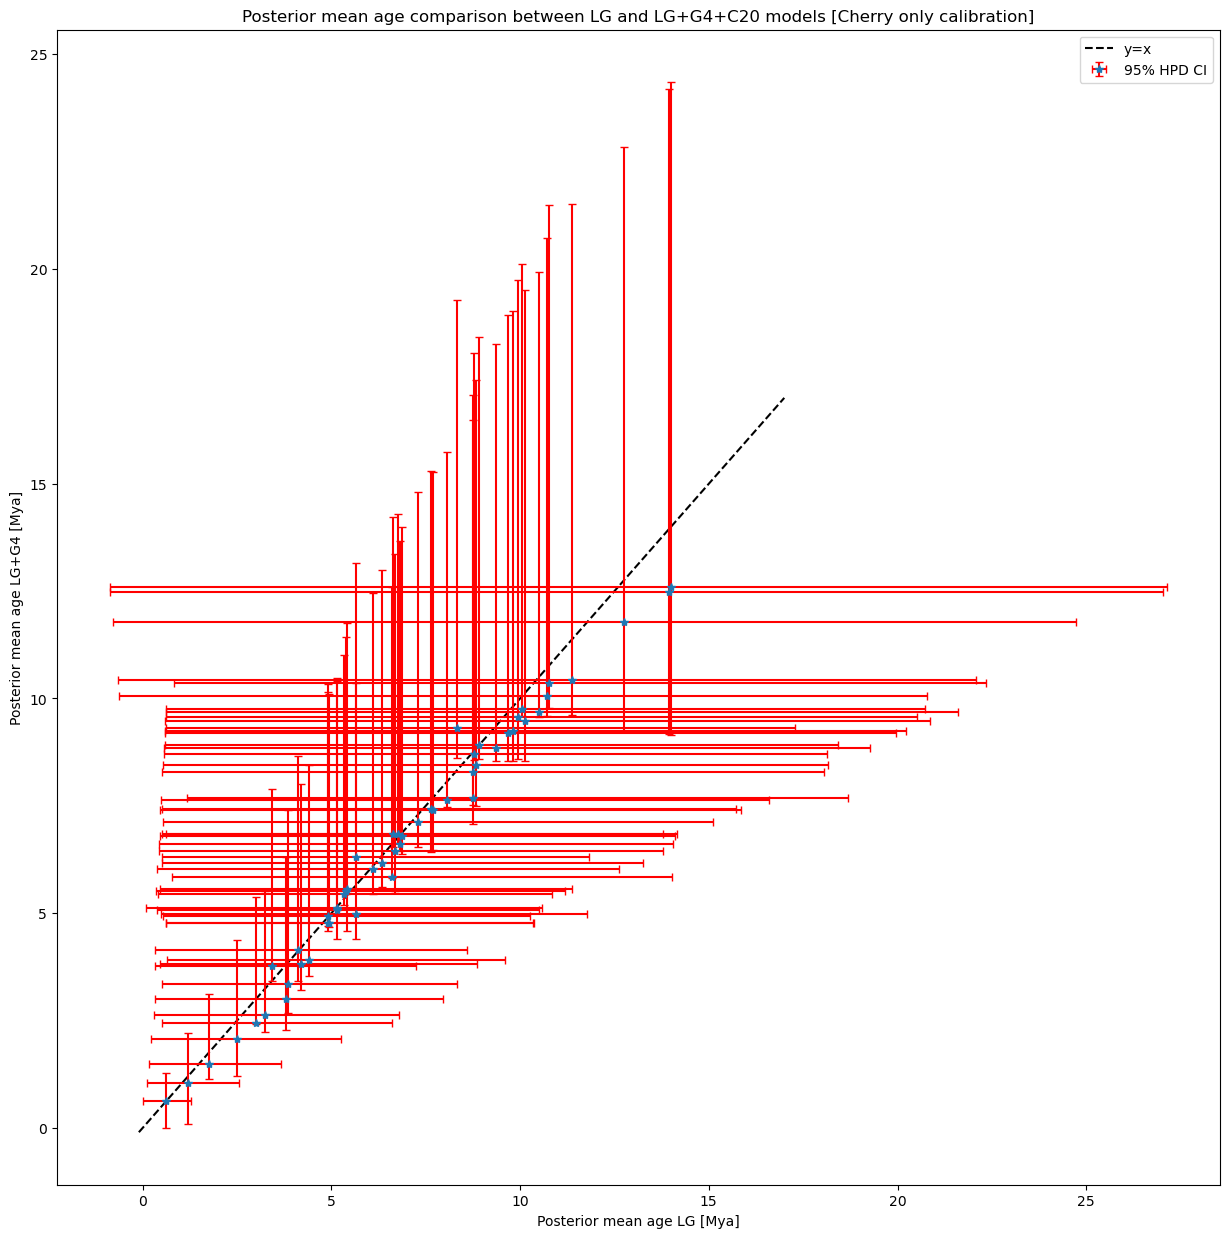

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20__co.png')

In [11]:
posterior_mean_baseml

[13.9988,
 13.9558,
 12.7637,
 11.3852,
 10.7122,
 9.9448,
 8.9104,
 4.9138,
 5.6452,
 3.8089,
 3.2353,
 2.5026,
 1.7483,
 1.2073,
 0.6258,
 4.1995,
 10.05,
 8.3269,
 8.777,
 6.34,
 5.4093,
 5.1448,
 10.5017,
 9.8248,
 9.359,
 8.7646,
 8.0594,
 7.6899,
 6.8079,
 6.0939,
 5.3998,
 4.1114,
 3.4395,
 6.6803,
 5.1469,
 10.1285,
 2.9979,
 9.6924,
 8.8198,
 7.6428,
 6.86,
 4.9222,
 5.3282,
 7.3056,
 6.6422,
 5.6528,
 4.9361,
 6.7745,
 10.7545,
 6.5998,
 3.8584,
 4.3969,
 8.7525]

In [12]:
posterior_mean_iqtree

[12.5892,
 12.4878,
 11.7851,
 10.4392,
 10.0493,
 9.5691,
 8.9116,
 4.7749,
 4.9762,
 3.0019,
 2.6301,
 2.0805,
 1.4788,
 1.0477,
 0.6232,
 3.809,
 9.7519,
 9.3207,
 8.7182,
 6.1739,
 5.5521,
 5.1258,
 9.6787,
 9.2319,
 8.8552,
 8.2814,
 7.6367,
 7.4107,
 6.6125,
 6.0232,
 5.5159,
 4.1437,
 3.7632,
 6.4586,
 5.0696,
 9.4728,
 2.4412,
 9.1915,
 8.4534,
 7.4168,
 6.7972,
 4.9394,
 5.4502,
 7.1345,
 6.8435,
 6.307,
 4.7642,
 6.8357,
 10.3515,
 5.8333,
 3.3617,
 3.9169,
 7.6764]

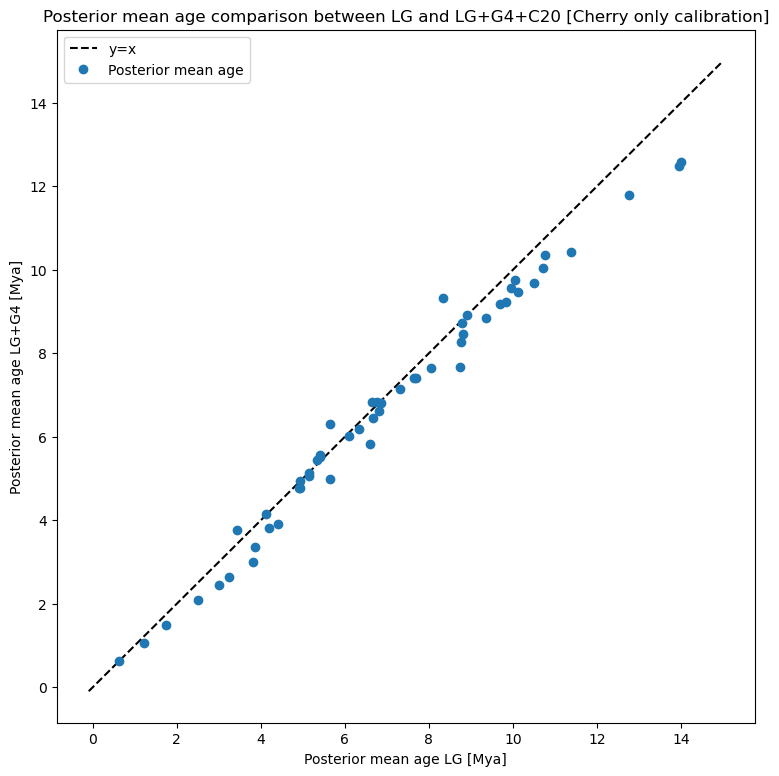

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_co_scatter.png')